In [1]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import warnings
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

edu_df = pd.read_sql_query('select * from useducation',con=engine)

# no need for an open connection, 
# as we're only doing a single query
engine.dispose()

In [3]:
edu_df = edu_df.fillna(0)
edu_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,0.0,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,471564.0,196386.0,676174.0,208.327876,252.187522,207.963517,0.000000
1,1992_ALASKA,ALASKA,1992,0.0,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,79117.0,30847.0,112335.0,0.000000,0.000000,0.000000,258.859712
2,1992_ARIZONA,ARIZONA,1992,0.0,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,437127.0,175210.0,614881.0,215.253932,265.366278,206.212716,262.169895
3,1992_ARKANSAS,ARKANSAS,1992,0.0,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,281338.0,123113.0,405259.0,210.206028,256.312090,208.634458,264.619665
4,1992_CALIFORNIA,CALIFORNIA,1992,0.0,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,3286034.0,1372011.0,4717112.0,208.398961,260.892247,196.764414,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1487,2017_VIRGINIA,VIRGINIA,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,248.041059,290.081407,227.598382,273.402640
1488,2017_WASHINGTON,WASHINGTON,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,241.701001,289.131257,223.123409,267.744778
1489,2017_WEST_VIRGINIA,WEST_VIRGINIA,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,236.057019,273.415854,217.316396,271.617023
1490,2017_WISCONSIN,WISCONSIN,2017,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,240.389213,288.143144,219.612694,258.700304


In [4]:
edu_df.drop(edu_df[edu_df['TOTAL_REVENUE'] == 0.0].index, inplace=True)
edu_df.drop(edu_df[edu_df['TOTAL_EXPENDITURE'] == 0.0].index, inplace=True)

## 1) Consider the two variables: TOTAL_REVENUE and TOTAL_EXPENDITURE. Do these variables have outlier values?

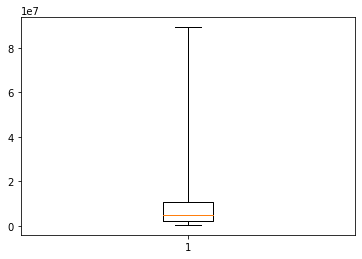

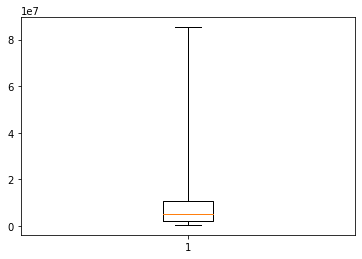

In [5]:
plt.boxplot(edu_df['TOTAL_REVENUE'], whis=20)
plt.show()
plt.boxplot(edu_df['TOTAL_EXPENDITURE'], whis=20)
plt.show()

## 2) If you detect outliers in the TOTAL_REVENUE and TOTAL_EXPENDITURE variables, apply the techniques you learned in this checkpoint to eliminate them and validate that there's no outlier values after you handled them.

In [6]:
from scipy.stats.mstats import winsorize

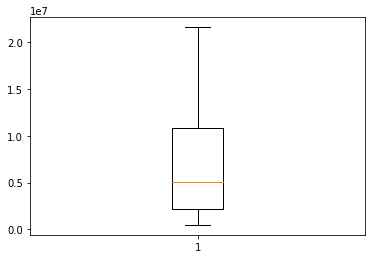

In [7]:
winsorized_rev = winsorize(edu_df["TOTAL_REVENUE"], (0, 0.10))
plt.boxplot(winsorized_rev)
plt.show()

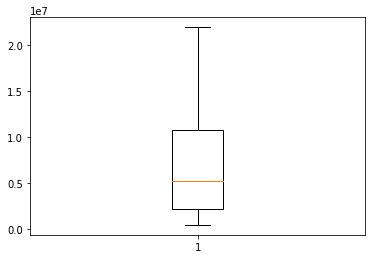

In [8]:
winsorized_exp = winsorize(edu_df["TOTAL_EXPENDITURE"], (0, 0.10))
plt.boxplot(winsorized_exp)
plt.show()

## 3) Create another variable by subtracting the original TOTAL_EXPENDITURE from TOTAL_REVENUE (before you eliminated the outliers). You can think of it as a kind of budget deficit in education. Do you find any outlier values in this new variable? If so, eliminate them using the technique you think most suitable.

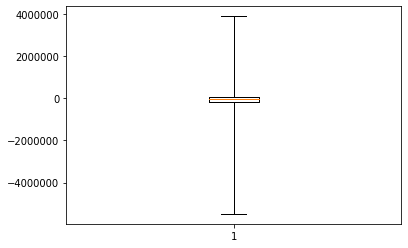

In [9]:
edu_df['REV-EXP'] = edu_df['TOTAL_REVENUE'] - edu_df["TOTAL_EXPENDITURE"]
plt.boxplot(edu_df['REV-EXP'], whis=1000)
plt.show()

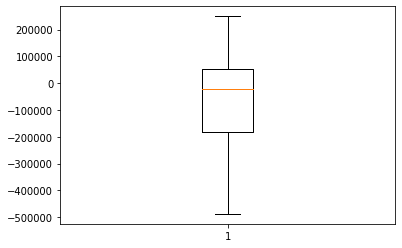

In [10]:
winsorized_revexp = winsorize(edu_df["REV-EXP"], (0.10, 0.10))
plt.boxplot(winsorized_revexp)
plt.show()

## 4) Now create another variable by subtracting the TOTAL_EXPENDITURE from TOTAL_REVENUE. This time, use the outlier eliminated versions of TOTAL_EXPENDITURE from TOTAL_REVENUE. In this newly created variable, can you find any outliers? If so, eliminate them.

## 5) Compare some basic descriptive statistics of the budget variables you end up with in the 3rd and the 4th questions. Do you see any differences?

## 6) If our variable of interest is the budget deficit variable, which method do you think is the appropriate in dealing with the outliers in this variable: the method in the 3rd question or the one in the 4th question?